In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import os

In [2]:
# choose basa or GG
database = 'basa' # 'basa' or 'GG'

if database == 'basa':
    results = 'results_basa'
    data_species = 'GAM_species/species_fit_140_0.01.pkl'
    windows = [(0, 40), (20, 60), (40, 80), (60, 100), (80, 120), (100, 140)]
    windows = [(0, 50), (51, 84), (85, 140)]
    
if database == 'GG':
    results = 'results_GG'
    data_species = '../data_GG/GAM/species_fit_301_0.01.pkl'
    windows = [(0, 100), (50, 150), (100, 200), (150, 250), (200, 300)]
    windows = [(0, 56), (57, 149), (150, 249), (250, 300)]

data_path = f'./{results}/transfer_entropies'

species_index = pd.read_pickle(f'{results}/species_index.pkl')
species_index_T = pd.Series(species_index)
species_index_T = pd.Series(species_index_T.index, index = species_index_T.values)
species_index_T = species_index_T.to_dict()

if database == 'basa':
    # ONLY NON AQUATIC SPECIES v2
    non_aq_species = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Gentiana,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Potentilla,Boraginaceae,Sedum,Helianthemum,Linum,Corydalis,Lamiaceae,Urticaceae,Rumex,Plumbaginaceae,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Geraniaceae,Campanulaceae,Dipsacaceae,Malvaceae,Violaceae,Convolvulaceae,Asphodelus,Liliaceae,Iridaceae,Erodium,Cytisus,Crassulaceae,Lycium,Ranunculaceae,Cistaceae,Orobanchaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Pinguicula,Droseraceae,Cannabis ,Epilobium,Aristolochia,Ranunculus'.split(',')
    # non aquatic species v3
    non_aq_species = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Boraginaceae,Sedum,Helianthemum,Lamiaceae,Urticaceae,Rumex,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Campanulaceae,Convolvulaceae,Liliaceae,Iridaceae,Crassulaceae,Ranunculaceae,Cistaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Ranunculus'.split(',')
    
    species_index_non_aq = {k: v for k, v in species_index.items() if k in set(non_aq_species)}
    species_index_T_non_aq = {v: k for k, v in species_index_non_aq.items()}

if database == 'GG':
    # ONLY NON AQUATIC SPECIES
    non_aq_species = 'Alchemilla,Chenopodiaceae,Artemisia,Cichoroideae,Asteroideae,Carduus,Asteraceae,Vernonia,Polygonum,Tribulus,Galium,Brassicaceae,Caryophylaceae,Swertia,Senecio,Erica,Hypericum,Anthospermum,Cerastium,Apiaceae,Podocarpus,Euclea,Hagenia,Juniperus,Myrsine,Rapanea,Rosa,Schefflera,Brucea,Sapotaceae,Iridaceae,Anthyllis,Maytenus,Buxus,Psydrax,Celastraceae,Celtis,Dodonaea,Ekebergia,Ephedra,Clematis,Myrica,Hypoestes,Ziziphus,Acanthus,Allophylus,Acacia,Combretum,Commiphora,Cussonia,Dobera,Lannea,Macaranga,Olea,Jasminum,Rhus,Securinega,Teclea,Zanthoxylum,Cassia,Capparidaceae,Acalypha,Euphorbia,Euphorbiacea,Phyllantus,Tamarindus,Alchornea,Aloe,Asphodellus,Leguminosae,Rubiaceae,Blepharis,Justicia,Heliotropium,Kohautia,Indigofera,Lamiaceae,Cerealia,Plantago,Planceolata,Poaceae,Rumex,Solanum,Urticaceae,Ricinus,Saussurea'.split(',')
    species_index_non_aq = species_index
    species_index_T_non_aq = species_index_T


abundances = pd.read_pickle(data_species)

In [ ]:
p_values_list = []
for idx,(start,end) in enumerate(windows):
    # end = start + window_width
    # Load the data
    original_table = pd.read_pickle(f'{data_path}/original_table_{start}-{end}.pkl')

    tables = []
    for i in range(0,1000):
        filename = f"TE_matrix{i}_{start}-{end}.pkl"
        filepath = os.path.join(data_path, filename)
        if os.path.exists(filepath):
            tables.append(pd.read_pickle(f'{data_path}/{filename}'))
    print(len(tables))

    p_values_list.append(np.zeros(original_table.shape))
    for table in tables:
        p_values_list[idx] += (original_table.values < table.values).astype(int)
    p_values_list[idx] /= len(tables)
    p_values_list[idx][np.eye(p_values_list[idx].shape[0], dtype=bool)] = np.nan

FileNotFoundError: [Errno 2] No such file or directory: './results_basa/transfer_entropies/original_table_0:50.pkl'

In [ ]:
# read granger causalities
granger_causalities = []
granger_causalities_p_values = []
for idx,(start,end) in enumerate(windows):
    granger_causality = pd.read_pickle(f'{results}/granger_causalities/original_table_{start}-{end}.pkl')
    granger_causality[granger_causality > 100] = 0
    granger_causality[granger_causality < -100] = 0
    granger_causality[np.eye(granger_causality.shape[0], dtype=bool)] = np.nan
    granger_causalities.append(granger_causality)

    granger_causality_p_values = pd.read_pickle(f'{results}/granger_causalities/original_table_p_values_{start}-{end}.pkl')
    granger_causality_p_values[np.eye(granger_causality_p_values.shape[0], dtype=bool)] = np.nan
    granger_causalities_p_values.append(granger_causality_p_values)

6.0
1.7410526315789474
1.4631578947368422
1.2398891966759003


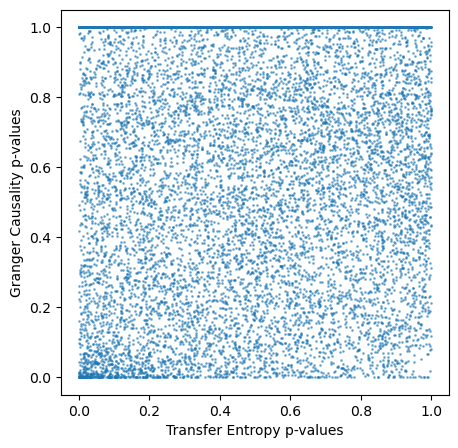

In [28]:
idx = 0
TE_p_values = p_values_list[idx].flatten()
GC_p_values = granger_causalities_p_values[idx].flatten()
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(TE_p_values, GC_p_values, alpha=0.5, s=1)
ax.set_xlabel('Transfer Entropy p-values')
ax.set_ylabel('Granger Causality p-values')

a = TE_p_values
b = GC_p_values

print(np.count_nonzero((a < 0.05) & (b < 0.05)) / (5*5))
print(np.count_nonzero((a < 0.05) & (b > 0.05)) / (5*95))
print(np.count_nonzero((a > 0.05) & (b < 0.05)) / (95*5))
print(np.count_nonzero((a > 0.05) & (b > 0.05)) / (95*95))

In [31]:
import networkx as nx



# grab the top L edges
# L = 100
graphs = []

for idx,(start,end) in enumerate(windows):
    
    # for the TE p_values (p_values_list) or the gc p_values (granger_causalities_p_values)
    # adjacency = p_values_list[idx]
    adjacency = granger_causalities_p_values[idx]
    # ONLY NON AQUATIC SPECIES
    species_list = list(species_index_T_non_aq.keys())
    adjacency_non_aq = adjacency[np.ix_(species_list, species_list)]

    # cut_value = np.sort(adjacency_non_aq.flatten())[L]
    cut_value = 0.10
    print(cut_value)
                                        # uncomment this to have an unweighted graph
    adjacency = (adjacency <= cut_value) #.astype(int)

    
    graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph, edge_attr='weight')
    # remove all nodes that are not in the non_aq_species list
    graph.remove_nodes_from([node for node in graph.nodes() if species_index_T[node] not in non_aq_species])
    graphs.append(graph)
    print(graph.number_of_edges())

# explanation cause it's confusing
# we need to create the graph with the indices of the original species index, so we use the whole adjacency matrix
# however to remove the aquatic nodes and keep 100 links, we count them on the adjacency_non_aq, then create the whole graph, then remove again the aquatic nodes
# this should leave about the 100 links

0.1
639
0.1
816
0.1
623


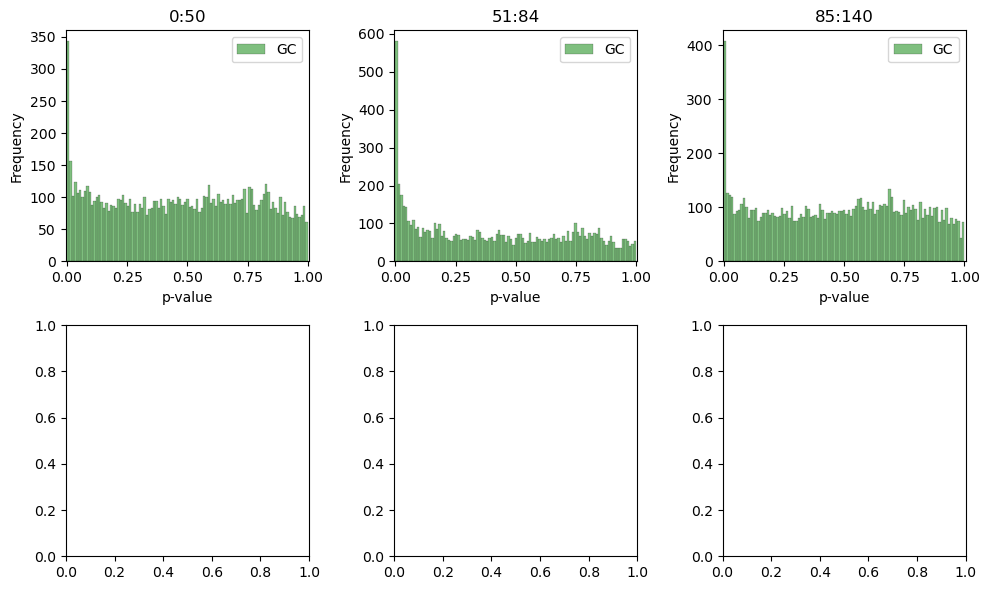

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(10, 6))
for idx,graph in enumerate(graphs):

    # every link that has a p-value of 1 in GC, put a p-value of 1 also in TE
    granger_causalities_p_values[idx][granger_causalities_p_values[idx] == 1.0] = np.nan
    # p_values_list[idx][granger_causalities_p_values[idx] == 1.0] = np.nan

    ax = axes.flatten()[idx]
    # ax.hist(p_values_list[idx].flatten(), bins = int(51), alpha=0.5, edgecolor='black', linewidth=0.25, color='blue', label='TE')
    granger_causality_pvalues = granger_causalities_p_values[idx].flatten()
    ax.hist(granger_causality_pvalues, bins = int(101), alpha=0.5, edgecolor='black', linewidth=0.25, color='green', label='GC')
    ax.set_xlabel('p-value')
    ax.set_ylabel('Frequency')
    ax.legend()
    (start, end) = windows[idx]
    ax.set_title(f'{start}-{end}')
    ax.set_xlim(-0.005,1.005)
fig.set_tight_layout(True)
# fig.savefig(f'./{results}/TE_vs_GC_p_values.png', dpi=300)

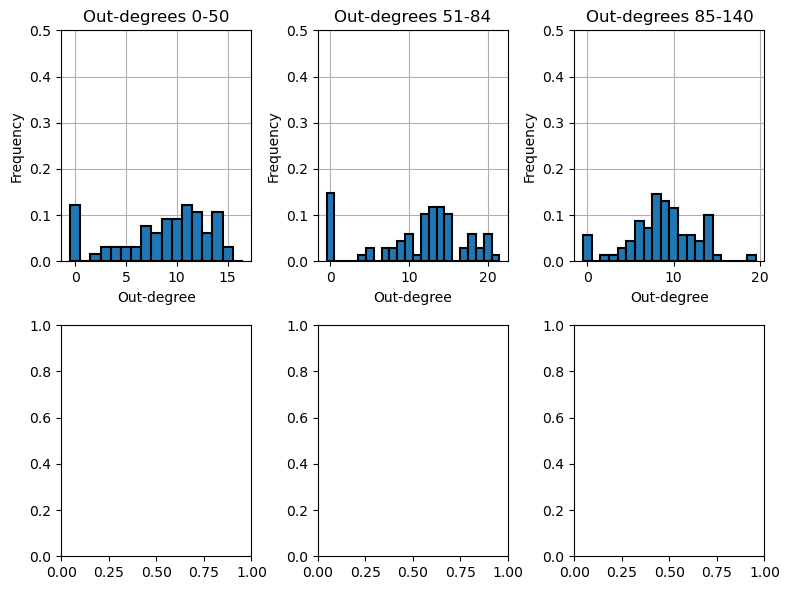

In [33]:
# calculate out-degree distributions

fig, axes = plt.subplots(2, 3, figsize=(8, 6))
degree_distributions = []
for idx, graph in enumerate(graphs):
    out_degree = np.array([graph.out_degree(n) for n in graph.nodes()])
    degree_distributions.append(out_degree)
    # plot the degree distributions
    ax = axes.flatten()[idx]
    ax.grid()
    ax.hist(out_degree, histtype='bar', bins=np.arange(-0.5, out_degree.max()+0.5, 1),
            density=True, zorder=3,
            edgecolor='black', linewidth=1.5)
    ax.set_xlabel('Out-degree')
    ax.set_ylabel('Frequency')
    (start, end) = windows[idx]
    ax.set_title(f'Out-degrees {start}-{end}')
    ax.set_ylim(0,0.5)

fig.set_tight_layout(True)

In [34]:
import graph_tool.all as gt


# Function that returns a generator for sequential colormap colors
def sequential_color_generator(cmap_name='tab10'):
    cmap = plt.get_cmap(cmap_name)
    index = 0
    while True:
        yield cmap(index % cmap.N)
        index += 1


# Create a graph-tool Graph object from the networkx graph
def SFDP_layout(network):
    g = gt.Graph(directed=True)
    vlist = {}
    for node in network.nodes:
        #add vertex with the same index as in networkx (example: '32848242')
        vlist[node] = g.add_vertex()
        
    for edge in network.edges:
        g.add_edge(vlist[edge[0]], vlist[edge[1]])


    state = gt.minimize_nested_blockmodel_dl(g)
    pos_gt = gt.sfdp_layout(g, groups=state.levels[0].b, gamma=0.001)
    print(state)
    pos = {}
    groups = {}
    generated_colors = {}
    color_gen = sequential_color_generator('tab10')

    for key, value in vlist.items():
        pos[key] = pos_gt[value]
        groups[key] = state.levels[0].b[value]
    for group in set(groups.values()):
        generated_colors[group] = next(color_gen) # np.random.rand(3,)
    colors = [generated_colors[groups[node]] for node in network.nodes]

    return pos, colors, state

In [35]:

def custom_seismic():
    # Colors: red -> gray -> blue
    colors = [
        (0.0, 'red'),
        (0.49, 'red'),
        (0.5, 'gray'),
        (0.51, 'blue'),
        (1.0, 'blue')
    ]
    return LinearSegmentedColormap.from_list('custom_seismic_gray', colors)

In [36]:
# for every edge in the graph, calculate the correlation between the abundances of the two species
def get_correlation_edges(graph, abundances):
    correlations_edges = []
    for edge in graph.edges:
        species1 = species_index_T[edge[0]]
        species2 = species_index_T[edge[1]]
        abundance1 = abundances[species1]['y']
        abundance2 = abundances[species2]['y']
        correlation = np.corrcoef(abundance1, abundance2)[0, 1]
        correlations_edges.append(correlation)
    correlation_edges = np.array(correlations_edges)
    return correlation_edges

def get_edge_colors_and_widths(graph : nx.DiGraph, abundances, p_values):

    weight_edges = get_correlation_edges(graph, abundances)
    # used for coloring the edges: blue if positive correlation, red if negative
    def get_edge_color(correlation):
        if correlation > 0: return 'blue'
        else: return 'red'
    edge_colors = [get_edge_color(correlation) for correlation in weight_edges]
    edge_colors = [custom_seismic()((correlation+1)/2) for correlation in weight_edges]
    edge_widths = []
    for edge in graph.edges:
        p_value = p_values[edge[0], edge[1]]
        edge_widths.append(1 / (p_value + 0.01)**(0.25))
    edge_widths = np.array(edge_widths)
    return edge_colors, edge_widths

In [20]:
# add many graphs together as one
big_graph = nx.DiGraph()
for idx, graph in enumerate(graphs):
    big_graph = nx.compose(big_graph, graph)

In [21]:
pos, colors, state = SFDP_layout(big_graph)

<NestedBlockState object, with base <BlockState object with 70 blocks (1 nonempty), degree-corrected, for graph <Graph object, undirected, with 70 vertices and 551 edges, at 0x7f03454a6660>, at 0x7f03454a6510>, and 8 levels of sizes [(70, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f03454a63c0>


<NestedBlockState object, with base <BlockState object with 70 blocks (1 nonempty), degree-corrected, for graph <Graph object, directed, with 70 vertices and 623 edges, at 0x7f030ff6aa30>, at 0x7f031c843750>, and 8 levels of sizes [(70, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f031c2b15b0>


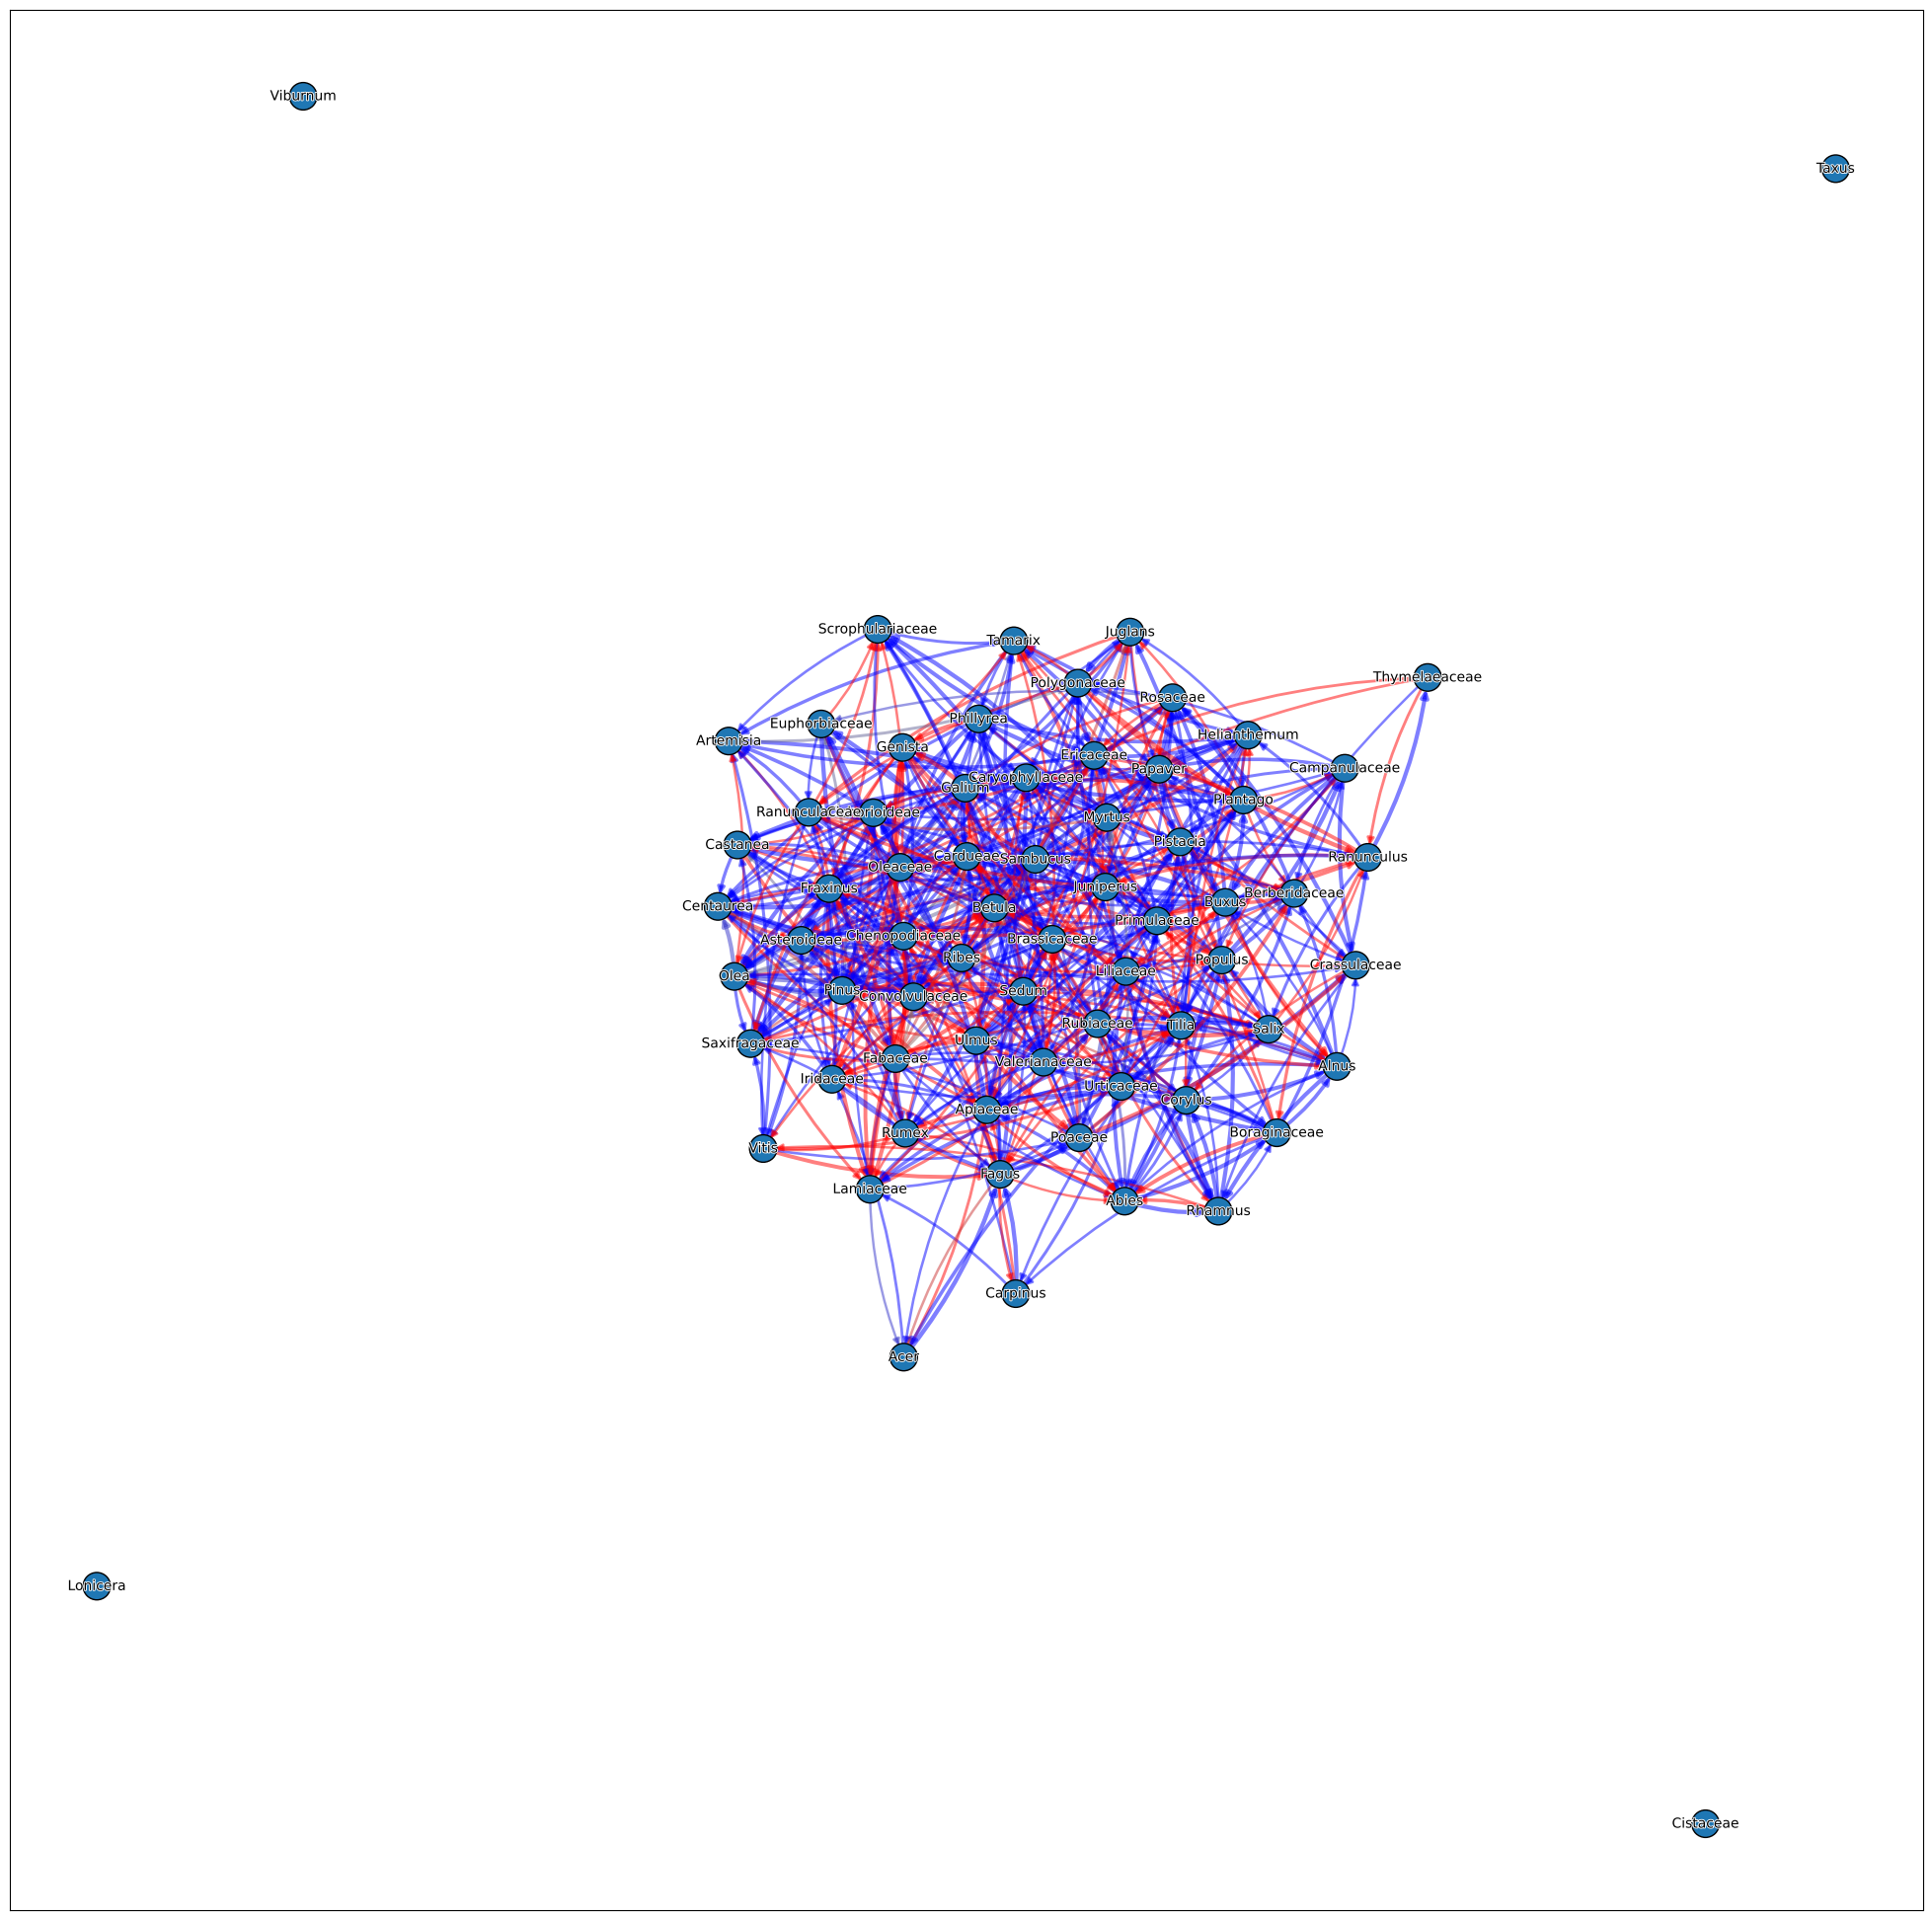

In [37]:
# select graph for visualization
idx = 2
(start, end) = windows[idx]

graph = graphs[idx]
granger_causality_p_values = granger_causalities_p_values[idx]


pos, colors, state = SFDP_layout(graph)

dict_abundances = {x:abundances[x]['y'].sum() for x in abundances.columns}
sizes = [dict_abundances[species_index_T_non_aq[x]] for x in graph.nodes]

edge_colors, edge_widths = get_edge_colors_and_widths(graph, abundances, granger_causality_p_values)
edge_colors = [granger_causalities[idx][u,v] for u, v in graph.edges()]
edge_colors = [custom_seismic()((causality+1)/2) for causality in edge_colors]

fig,ax = plt.subplots(figsize=(25, 25))

# size of the abundances
# nx.draw_networkx_nodes(graph, ax = ax, node_size=[np.sqrt(size)*150 for size in sizes], node_color='grey', pos=pos, edgecolors='black', linewidths=1, alpha=1)
# constant size and color of the group
nx.draw_networkx_nodes(graph, ax = ax, node_size=400, node_color=colors, pos=pos, edgecolors='black', linewidths=1, alpha=1)

nx.draw_networkx_edges(graph, ax = ax, alpha = 0.5, pos=pos, width=edge_widths, edge_color = edge_colors, connectionstyle='arc3,rad=0.1') #edge_color=edge_colors)

texts = nx.draw_networkx_labels(graph, ax = ax, font_size=10, labels=species_index_T_non_aq,
                        pos=pos, font_color='black', font_family='sans-serif');

for text in texts.values():
    text.set_path_effects([path_effects.Stroke(linewidth=1.3, foreground='white'),
                    path_effects.Normal()])

# fig.savefig(f'results_basa/gc_networks/fire_windows/gc_network_{start}-{end}_positioned.pdf', dpi=300, bbox_inches='tight')

In [39]:
for edge in graph.edges:
    # assign the weight to the edge
    # if nan or inf, set to 0
    if np.isnan(granger_causalities[idx][edge[0], edge[1]]) or np.isinf(granger_causalities[idx][edge[0], edge[1]]):
        graph.edges[edge]['weight'] = 0
    else:
        graph.edges[edge]['weight'] = granger_causalities[idx][edge[0], edge[1]]

In [57]:
reordered_A[reordered_A != 0] = 1

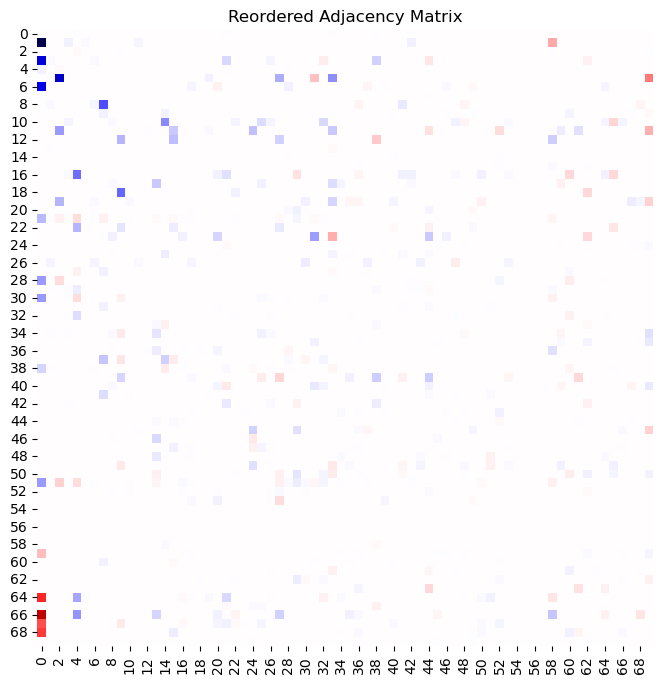

In [63]:
import networkx as nx
import numpy as np
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eig

G = graph
A = nx.to_numpy_array(G)
# the original graph has the species as indices, so we create a new one
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# A = np.abs(A)

#---------------------------------------------------------------------------------
# # Compute Laplacian and its eigenvectors
# L = laplacian(A, normed=True)
# _, vecs = eig(L)
# # Get the Fiedler vector (2nd smallest eigenvalue)
# fiedler_vector = np.real(vecs[:, 1])
# # Reorder the adjacency matrix based on the Fiedler vector
# reordered_indices = np.argsort(fiedler_vector)
# reordered_A = A[reordered_indices][:, reordered_indices]
#---------------------------------------------------------------------------------
degrees = dict(G.degree())
# degrees with weights
degrees = A.sum(axis=0) + A.sum(axis=1)
degrees = {i: degrees[i] for i in range(len(degrees))}
# Sort nodes by degree
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)
reordered_A = A[np.ix_(sorted_nodes, sorted_nodes)]
#---------------------------------------------------------------------------------

# Seriation (Optimal Leaf Ordering)

# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.hierarchy import optimal_leaf_ordering, linkage, leaves_list

# D = squareform(pdist(A))
# Z = linkage(D, method='average')
# Z_opt = optimal_leaf_ordering(Z, D)
# sorted_nodes = leaves_list(Z_opt)
# reordered_A = A[np.ix_(sorted_nodes, sorted_nodes)]

#---------------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(reordered_A, cmap='seismic_r', square=True, cbar=False, center=0)
plt.title("Reordered Adjacency Matrix")
plt.show()


In [33]:
state.print_summary()

l: 0, N: 70, B: 1
l: 1, N: 1, B: 1


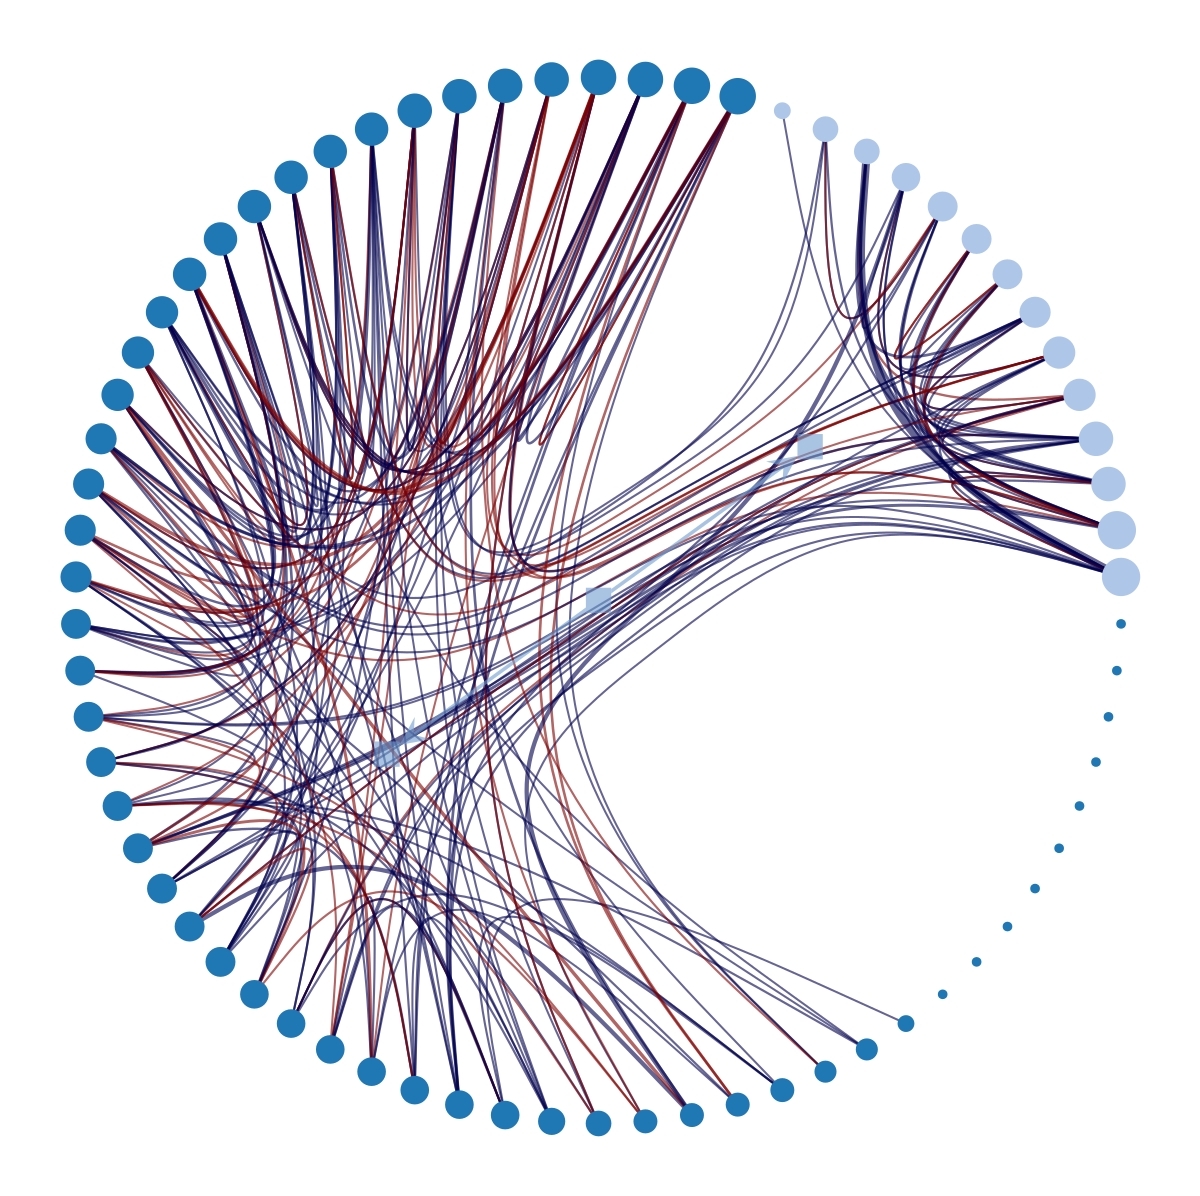

In [ ]:

import graph_tool.all as gt
import matplotlib.cm
gt.seed_rng(1)

g = gt.Graph(directed=False)

eweight = g.new_ep("double")
eweight_static = g.new_ep("double")

ecolor = g.new_ep("double")

vlist = {}
for node in graph.nodes:
    #add vertex with the same index as in networkx (example: '32848242')
    vlist[node] = g.add_vertex()
for edge in graph.edges:
    g.add_edge(vlist[edge[0]], vlist[edge[1]])
    eweight[g.edge(vlist[edge[0]], vlist[edge[1]])] = np.abs(granger_causalities[idx][edge[0], edge[1]])
    eweight_static[g.edge(vlist[edge[0]], vlist[edge[1]])] = np.abs(granger_causalities[0][edge[0], edge[1]])
    ecolor[g.edge(vlist[edge[0]], vlist[edge[1]])] = 0 if (granger_causalities[idx][edge[0], edge[1]] > 0) else 1
state = \
    gt.minimize_nested_blockmodel_dl(g)

# ARGUMENTS FROM draw_hierarchy()
state.draw(
        ecmap=(matplotlib.cm.seismic, .6),
        edge_color=ecolor,
        eorder=eweight_static,
        edge_pen_width=gt.prop_to_size(eweight,
                                          1, 4,
                                          power=1,
                                          log=False),
        edge_gradient=[]);


In [ ]:
state

NameError: name 'graphs' is not defined

In [62]:
172/4900

0.03510204081632653

In [61]:
for i in range(0,len(graphs)-2):
    edg1 = set(graphs[i].edges)
    edg2 = set(graphs[i+2].edges)
    temporality = 1. - (1. - len(edg1 & edg2) / len(edg1 | edg2))
    # print(f'Intersection of edges at {i*20+20}: {len(edg1 & edg2)}')
    # print(f'Union of edges at {i*20+20}: {len(edg1 | edg2)}')
    print(f'1 - temporality at {i*(window_width/2)+window_width}: {temporality:.4f}')
    print(graphs[i].number_of_edges(), graphs[i+2].number_of_edges(), graphs[i].number_of_nodes()**2)

1 - temporality at 40.0: 0.0364
172 198 4900
1 - temporality at 60.0: 0.0157
148 176 4900
1 - temporality at 80.0: 0.0260
198 197 4900
1 - temporality at 100.0: 0.0151
176 160 4900


In [50]:
# highest degrees

degrees = pd.DataFrame(graph.in_degree(), columns=['node', 'degree'])
degrees['node'] = degrees['node'].map(species_index_T)
degrees.sort_values(by='degree', ascending=False, inplace=True)
degrees

,node,degree
13,Fagus,16
30,Olea,10
28,Oleaceae,10
19,Phillyrea,10
16,Castanea,10
...,...,...
22,Viburnum,0
11,Acer,0
17,Pistacia,0
18,Rhamnus,0


Text(0, 0.5, 'Frequency')

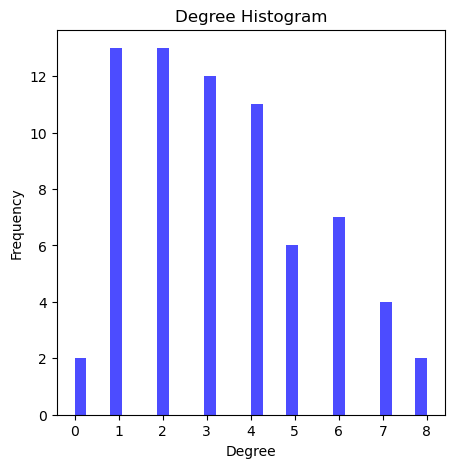

In [44]:
# degree distribution

plt.figure(figsize=(5, 5))
plt.hist(degrees['degree'], bins=30, color='blue', alpha=0.7)
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")

Fagus


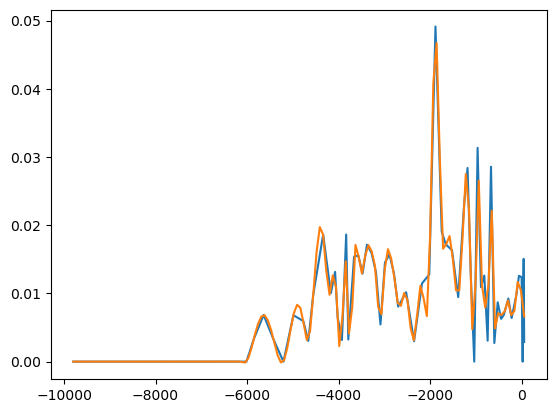

In [51]:
species1 = 'Geraniaceae'
species1 = 'Olea'
species1 = 'Cistaceae'
species1 = degrees['node'].iloc[0]
species1 = 'Fagus'
print(species1)
plt.plot(abundances[species1]['prev_x'], abundances[species1]['prev_y'])
plt.plot(abundances[species1]['x'], abundances[species1]['y'])


In [52]:
def load_pickle_with_pandas(filepath, retry_delay=1):
    while True:
        try:
            df = pd.read_pickle(filepath)
            print("Pickle file loaded successfully.")
            return df
        except Exception as e:
            print(f"Error reading pickle file: {e}. Retrying in {retry_delay} second(s)...")
            time.sleep(retry_delay)

In [53]:
dirdatain = '../code/GAM_species'
fit_type = 'fit_140_0.01'

species_df = load_pickle_with_pandas(f'{dirdatain}/species_%s.pkl' %(fit_type))

Pickle file loaded successfully.


In [56]:
species_df['Fagus']['y'][0:40]

array([ 2.99822968e-10, -2.10863792e-11,  5.65078227e-11,  6.38737127e-11,
        9.22438185e-11,  7.97101378e-11,  5.77807507e-11,  7.25137329e-11,
        1.36390663e-10,  5.18798945e-11,  8.18487162e-11,  7.24322885e-11,
        7.74416946e-11,  7.55578352e-11,  1.47557418e-11,  5.03014141e-11,
        6.53990837e-11,  5.97524643e-11,  6.27371792e-11,  5.77602844e-11,
        3.73451790e-11,  2.73985782e-11,  2.98955019e-11,  3.12529690e-11,
        4.23838777e-11,  4.22096967e-11,  7.11399897e-11,  9.28367556e-11,
        8.93259850e-11,  8.93496180e-11,  9.07119770e-11,  8.37627259e-11,
        1.03200483e-10,  1.16955510e-10,  9.29167880e-11,  8.25252731e-11,
        8.62191585e-11,  9.12099875e-11,  5.41517985e-11,  1.88020172e-10])

In [70]:
dirdatain = '../data/'
mydf = pd.read_csv(dirdatain+'bsm_raw_pollen.csv')
mydf = mydf.fillna(0)
mydf['age'] = -mydf['age']
mydf = mydf.sort_values(by=['age'])


In [71]:
mydf = pd.Series(mydf.values[:,2:].flatten())


In [75]:
mydf[mydf > 0].describe()

count    5585.000000
mean        0.026023
std         0.068739
min         0.001629
25%         0.003236
50%         0.006803
75%         0.018634
max         0.778502
dtype: float64